In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../')
import dataset_wrapper as util

In [ ]:
import ee
ee.Authenticate() 
ee.Initialize()

In [4]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/FoundationModel/SHPs/California_Counties.geojson')
dataframe = dataframe.to_crs(epsg=4326)

### SSURGO Data

In [ ]:
util.SSURGODownloader(county_name = 'Monterey', year = 2008)()

### Visualization

Found 221 unique soil types.


(-122.069250878514, -120.123505751254, 35.73225505738112, 36.97240935530388)

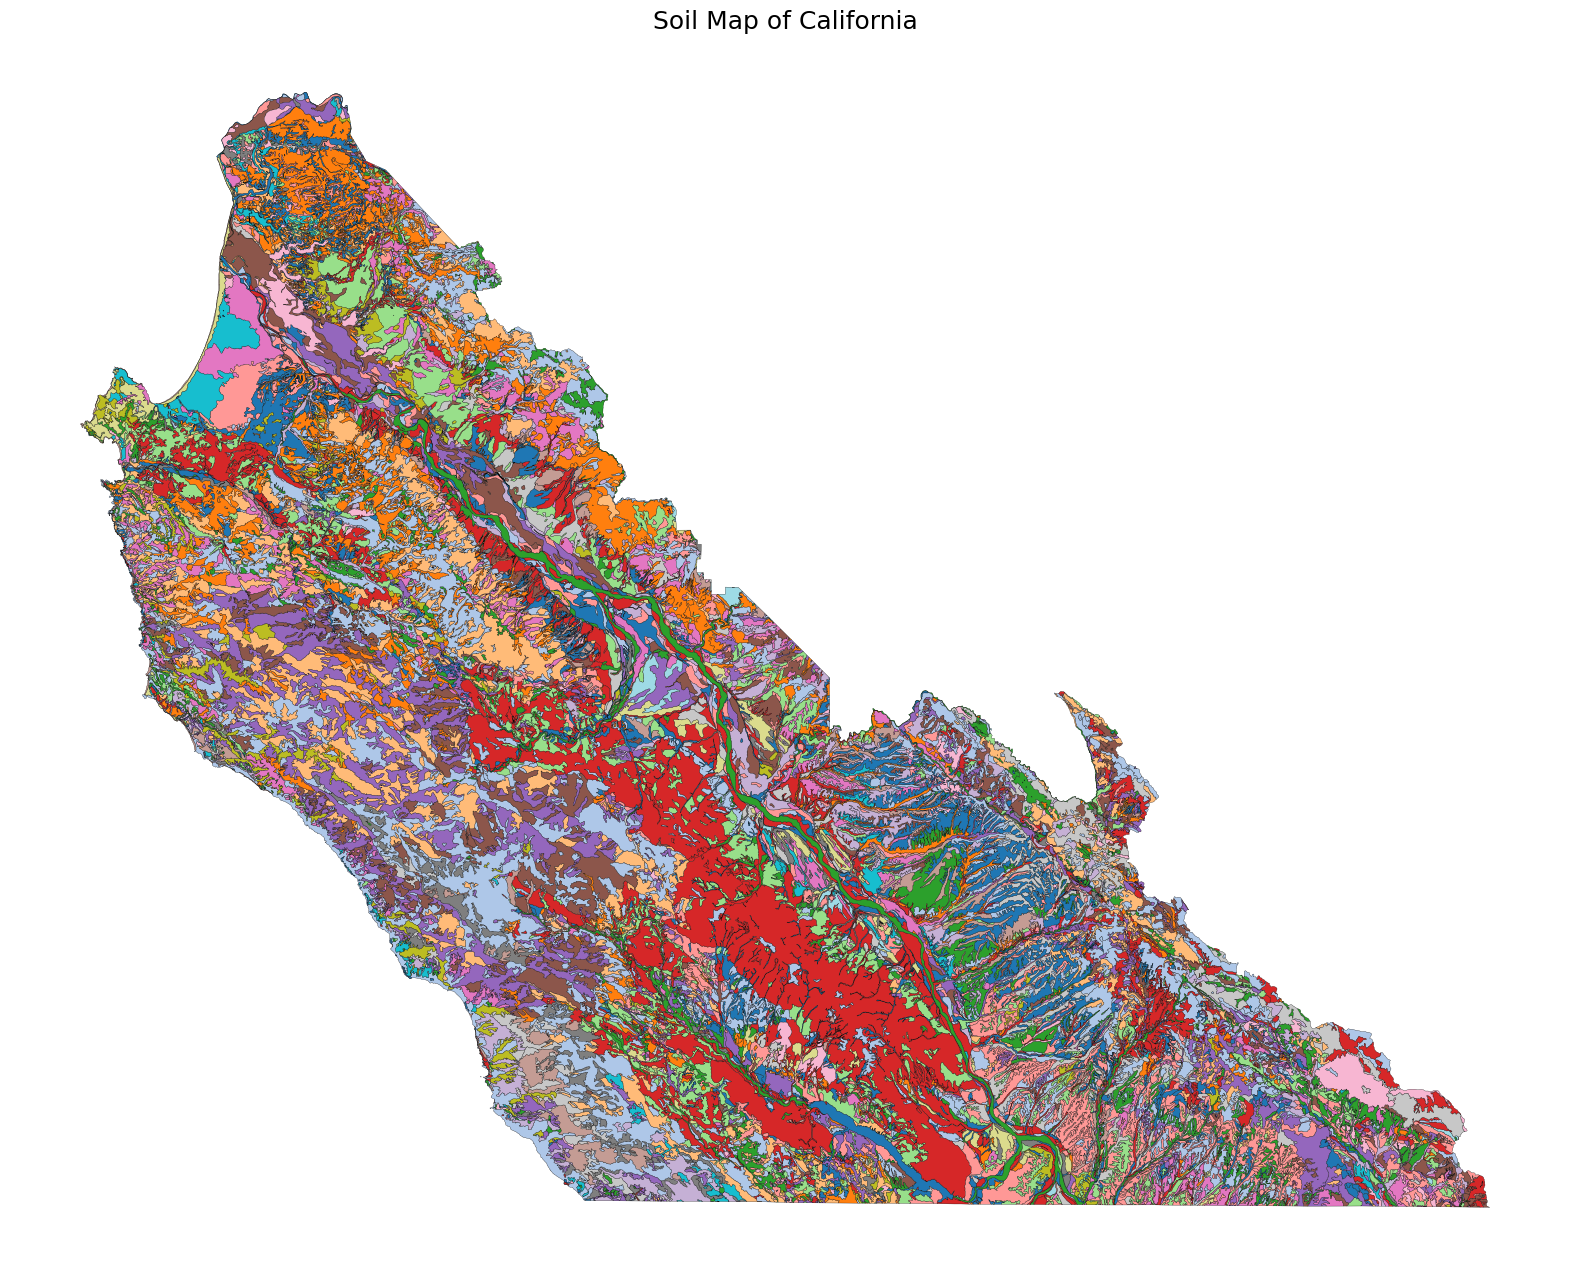

In [23]:
gdf = gpd.read_file('/data2/hkaman/Data/FoundationModel/Monterey/Soil/Monterey/spatial/soilmu_a_ca053.shp')

# Assign unique colors for each soil type
unique_soil_types = gdf["MUSYM"].unique()
print(f"Found {len(unique_soil_types)} unique soil types.")

# Create a colormap with unique colors
colormap = plt.cm.get_cmap("tab20", len(unique_soil_types))  # Use a categorical colormap
color_mapping = {soil_type: colormap(i) for i, soil_type in enumerate(unique_soil_types)}

# Add a color column to GeoDataFrame
gdf["color"] = gdf["MUSYM"].map(color_mapping)

# Plot the entire California map
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(ax=ax, color=gdf["color"], edgecolor="black", linewidth=0.2)

# Customize the map
ax.set_title("Soil Map of California", fontsize=18)
ax.axis("off")

In [ ]:
attribute_matrix = util.soil_vars_gen(county_name = 'Monterey')

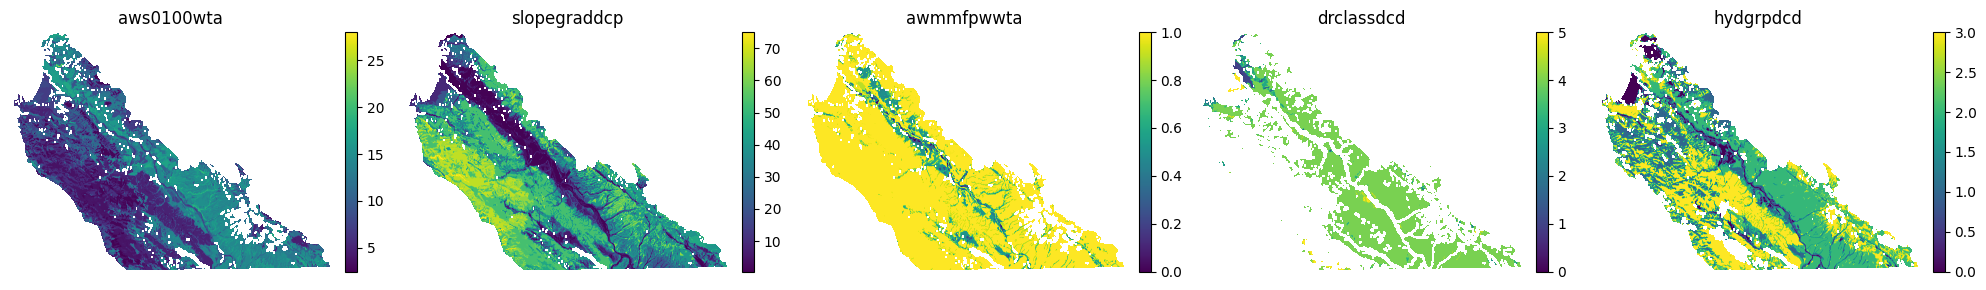

In [11]:
util.plot_soil_vars(attribute_matrix)

In [5]:
util.modify_soil_attr_df(county_name = 'ContraCosta')

,aws0100wta,slopegraddcp,awmmfpwwta,drclassdcd,hydgrpdcd,mukey
0,3.60,25.0,1.0,Somewhat excessively drained,D,2747719
1,3.60,60.0,1.0,Somewhat excessively drained,D,2747722
2,7.36,40.0,1.0,Somewhat excessively drained,D,2833391
3,7.36,63.0,1.0,Somewhat excessively drained,D,2833392
4,17.35,1.0,1.0,Well drained,C,2833408
...,...,...,...,...,...,...
130,15.96,23.0,1.0,Well drained,C,455760
131,15.96,12.0,1.0,Well drained,C,455759
132,10.98,63.0,1.0,Well drained,D,455758
133,9.30,40.0,1.0,Well drained,D,455757


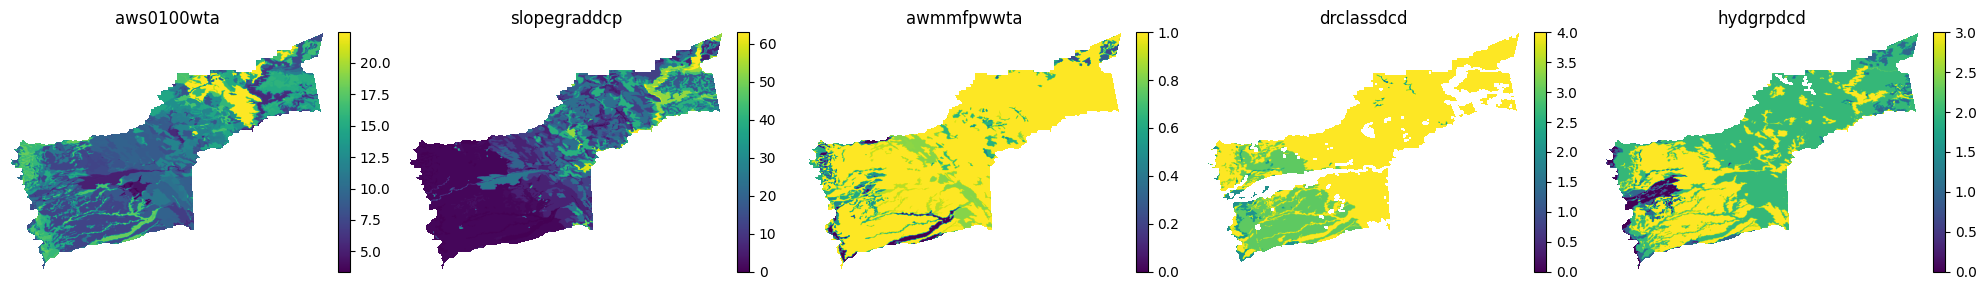

In [36]:
attribute_matrix = util.soil_vars_gen(county_name = 'Yuba')
util.plot_soil_vars(attribute_matrix)

In [17]:
out = util.ca_soil_vars_gen()

In [18]:
out.shape

(5, 34656, 31445)

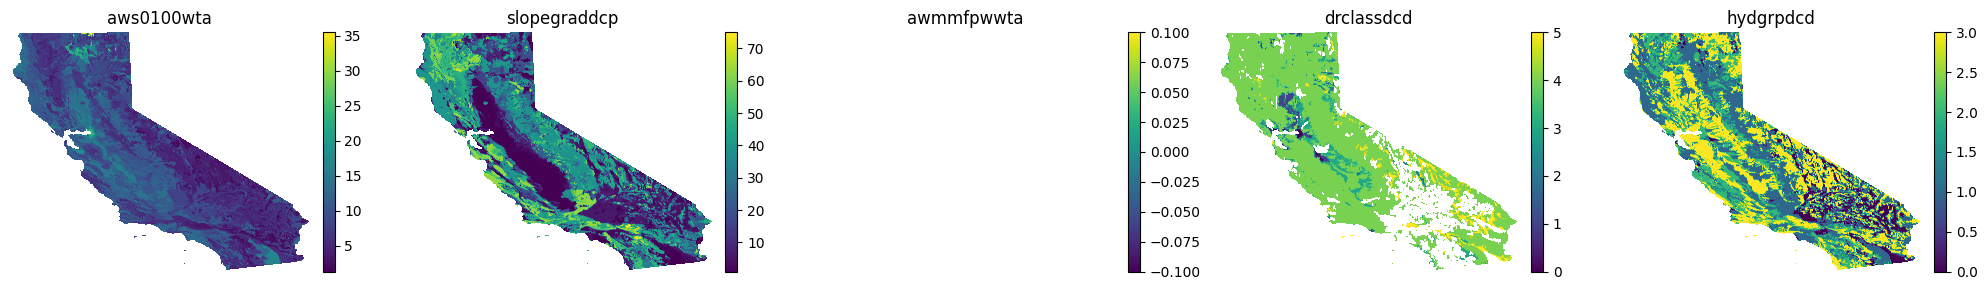

In [19]:
util.plot_soil_vars(out)